# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [35]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [36]:
import numpy as np
m_max = 10

def get_design_matrix(x, m):
    
    x_arr = np.array(x).reshape(-1, 1)
    A = x_arr ** 0
    
    for k in range(1, m+1):
        A = np.column_stack((A, x_arr ** k))
    return A

beta_arr = []
for m in range(m_max):
    A = get_design_matrix(x, m)
    beta = np.linalg.solve(A.T @ A, A.T @ y)
    beta_arr.append(beta)
    
print(beta_arr)

[array([0.79066667]), array([-0.6479869 ,  1.46502399]), array([-1.25772058, -0.65313865,  1.0667959 ]), array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301]), array([ 0.51184244, -0.33857023, -2.05689291,  1.08931365, -0.01872316]), array([ 0.53158296, -0.24431123, -2.15174437,  0.99954653,  0.07265921,
       -0.01835276]), array([ 0.58335489, -0.21341539, -2.47667914,  1.08743364,  0.3156542 ,
       -0.17478186,  0.02574425]), array([ 0.5744677 , -0.13006497, -2.3829579 ,  0.80842609,  0.3196533 ,
        0.0116892 , -0.06899496,  0.01366621]), array([ 0.53749246, -0.37095536, -2.06051933,  1.53912235, -0.54617266,
       -0.22834563,  0.51017192, -0.21721566,  0.02885626]), array([ 0.50918939, -0.43758282, -1.67901144,  1.61523578, -1.43465946,
        0.20209008,  0.91271624, -0.64210814,  0.16431079, -0.01477536])]


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [37]:
def get_sigma(beta, x, y):
    x_arr = np.array(x)
    m = len(beta) - 1;
    n = len(x)
    sigma = 1/(n-m)*((np.polynomial.polynomial.polyval(x_arr, beta) - y) ** 2).sum()
    
    return sigma

for m in range(m_max):
    print(get_sigma(beta_arr[m], x, y))

7.495379555555556
4.4502158667062055
2.453426997579178
0.012470899099731644
0.012460407583510002
0.012600059280330703
0.011590813700606627
0.012289041756436764
0.011569371524732407
0.01293104518186956


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

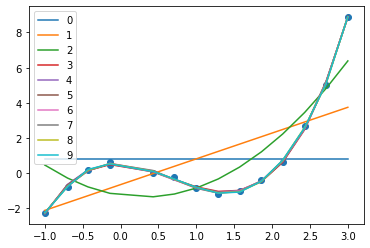

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
x = 

for beta in beta_arr:
    poly = np.polynomial.polynomial.polyval(x, beta)
    plt.plot(x, poly, label=(len(beta)-1))

plt.legend()

m=3 is enough. The values of the metric sigma squared consistent with plot

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [39]:
m = 3
def solve_lls_via_qr(A, b):
    m = A.shape[1]
    Q, R = np.linalg.qr(A)
    f = (Q.T @ b)[:m]
    
    return np.linalg.solve(R[:m], f)

beta_qr_3 = solve_lls_via_qr(get_design_matrix(x,3), y)
print(beta_qr_3)
print(beta_arr[3])

[ 0.49483598 -0.26983377 -2.01973166  1.01540301]
[ 0.49483598 -0.26983377 -2.01973166  1.01540301]


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

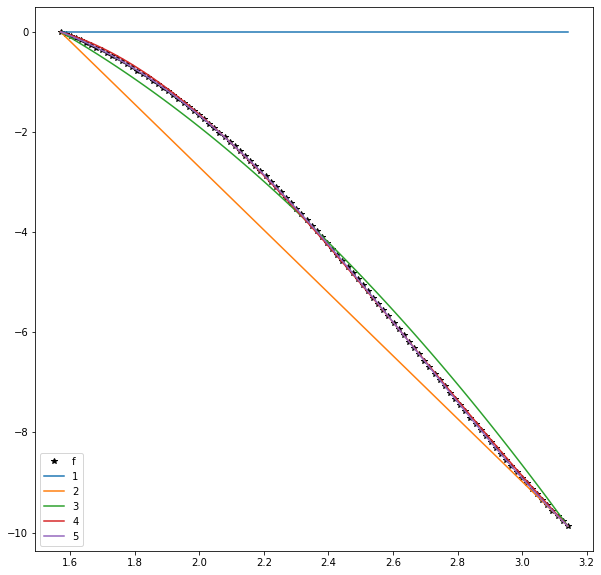

In [41]:
def interpolate_lagrange(x, x_nodes, y_nodes):
    result = np.zeros(len(x))
    
    for i in range(len(x_nodes)):
        l_i = 1
        for j in range(len(x_nodes)):
            if i==j:
                continue
                
            l_i *= x - x_nodes[j]
            l_i /= x_nodes[i] - x_nodes[j]
        
        result += y_nodes[i] * l_i
        
    return result

f = lambda x: x ** 2 * np.cos(x)
x = np.linspace(np.pi/2,np.pi, 100)
plt.figure(figsize=(10,10)) 
plt.plot(x, f(x), "k*", label='f')

for m in range(1,6):
    nodes = np.linspace(np.pi/2, np.pi, m)
    plt.plot(x, interpolate_lagrange(x, nodes, f(nodes)), label=m)
    
plt.legend();

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

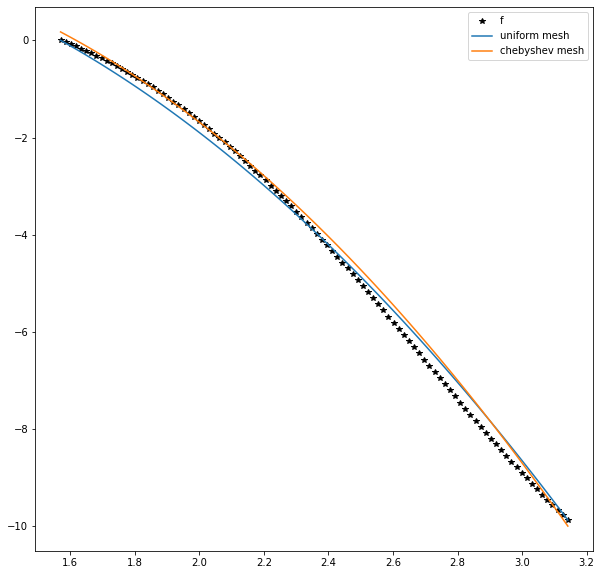

In [43]:
m = 3
a = np.pi/2
b = np.pi
chebyshev_mesh = np.cos(2*np.arange(m)+1/m)
chebyshev_mesh = (chebyshev_mesh + 1) *(b-a)/2 + a

plt.figure(figsize=(10,10)) 
x = np.linspace(np.pi/2,np.pi, 100)
plt.plot(x, f(x), "k*", label='f')
nodes = np.linspace(np.pi/2, np.pi, m)
plt.plot(x, interpolate_lagrange(x, nodes, f(nodes)), label='uniform mesh')
plt.plot(x, interpolate_lagrange(x, chebyshev_mesh, f(chebyshev_mesh)), label='chebyshev mesh')

plt.legend();